In [6]:
import numpy as np

# Домашнее задание на повторение numpy
В задании все пункты необходимо выполнить с помощью numpy, без использования циклов/map/и тд! 

Задание выполняется __самостоятельно__. Категорически запрещено пользоваться чужими решениями заданий (даже смотреть их), в том числе, размещенными в открытых источниках (если таковые обнаружатся). При обнаружении списывания выставляется 0 за задание (в случае списывания у одногруппника/однокурскника - __ему/ей тоже__), а также подается докладная записка в учебный офис. Проверка на списывание проводится и автоматическими средствами, и вручную.

### История

В конце каждого семестра каждый семинарист сталкивается с необходимостью выставить студентам накопленную в семестре оценку. Часто семинаристы делают это с помощью Excel или GoogleSheets, но поверьте, с этим возникают проблемы. В задании вам надо помочь семинаристу некоторого курса выполнить эту непростую работу с помощью numpy :)

Выполните ячейку ниже, чтобы загрузить данные и визуально проверить корректность их считывания.

По строкам - студенты, по столбцам - их оценки. В курсе семинарист провел три проверочных (первые три колонки), выдал три домашних работы (следующие три колонки), кроме того, у студентов есть оценка за коллоквиум (последняя колонка).

In [7]:
marks = np.loadtxt("https://raw.githubusercontent.com/nadiinchi/iad2019/master/materials/data_hw1.txt")

In [8]:
marks[:3]

array([[ 7. ,  8. , 10. ,  0. ,  0. ,  2.1,  1.5],
       [ 0. ,  6. ,  4.4,  4. ,  0. ,  5. ,  4.3],
       [ 3. ,  7. ,  8.7,  7.6,  7. ,  9.7, 10. ]])

### Число студентов (0.5 балла)
Сколько студентов в группе семинариста?

In [9]:
# Записать ответ в переменную num_studs
num_studs = marks.shape[0]

In [10]:
print(num_studs)

28


### Очень сложная проверочная, или просто добрый семинарист (1.25 балла)
Семинарист помнит, что первая проверочная получилась очень сложной, и максимальный балл в группе был далеко не 10. Поэтому он решил перенормировать баллы за эту проверочную на максимум по группе (поделить на максимум и умножить на 10) - чтобы у студента с максимальной оценкой получилось 10, а у остальных - просто оценка больше.

Каков максимальный балл за первую проверочную?

In [12]:
# Записать ответ в переменную max_mark
max_mark = np.max(marks, axis=0)[0]

In [13]:
print(max_mark)

7.0


Разделите первый столбец на max_mark (для этого надо выделить столбец, поставить после соответствующего выражения знак = и присвоить новое значение столбца)

In [14]:
marks[:, 0] = marks[:, 0] / max_mark * 10

Снова вычислите максимальный балл за первую проверочную (теперь он должен быть равен 10):

In [15]:
print(np.max(marks, axis=0)[0])

10.0


### Подсчет накопленной оценки (1.25 балла)
Для вычисления накопленной надо посчитать средние оценки за проверочные для каждого студента и средние за домашние работы (может пригодиться np.mean). Накопленная оценка есть 0.3\*Проверочные + 0.4\*Домашние + 0.3\*Коллоквиум. Вычислите накопленные оценки и добавьте их в последний столбец матрицы (нужно добавить еще один новый столбец).

In [16]:
# Веса следует брать из переменной weights, а не вписывать вручную
weights = [0.3, 0.4, 0.3]

In [17]:
mean_cw = np.mean(marks[:, 0:3], axis=1)
mean_hw = np.mean(marks[:, 3:6], axis=1)

In [18]:
gain = mean_cw * weights[0] + mean_hw * weights[1] + marks[:, 6] * weights[2]
gain = gain.reshape(-1, 1)

In [19]:
new_marks = np.hstack((marks, gain))

In [20]:
new_marks

array([[10.        ,  8.        , 10.        ,  0.        ,  0.        ,
         2.1       ,  1.5       ,  3.53      ],
       [ 0.        ,  6.        ,  4.4       ,  4.        ,  0.        ,
         5.        ,  4.3       ,  3.53      ],
       [ 4.28571429,  7.        ,  8.7       ,  7.6       ,  7.        ,
         9.7       , 10.        ,  8.23857143],
       [ 4.85714286,  1.3       ,  7.        ,  3.4       ,  0.        ,
         9.4       ,  9.        ,  5.72238095],
       [ 9.71428571,  9.1       ,  8.2       ,  0.        ,  0.        ,
         7.9       ,  7.9       ,  6.1247619 ],
       [10.        , 10.        , 10.        ,  9.        ,  9.5       ,
        10.        ,  8.        ,  9.2       ],
       [ 8.57142857, 10.        ,  9.7       ,  8.7       ,  7.        ,
         8.5       ,  9.7       ,  8.96380952],
       [ 0.        ,  9.3       ,  5.7       ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.5       ],
       [ 7.14285714, 10.        

### Студенты, которых, вероятно, отчислят (1.25 балла)

Сколько в группе студентов с накопленной оценкой 0? Вам может понадобиться тот факт, что применение np.sum к бинарному вектору дает число значений True в нем, например:

In [21]:
np.sum([True, False, True]) # 2 значения True

2

Также обратим внимание на операцию поэлементного сравнения, возвращающую массив из True и False:

In [22]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 3])
print(a == b)
print(a > b)

[False False  True]
[False False False]


In [23]:
np.sum(new_marks[:, -1] == 0)

3

### Студенты, которые получат автоматы (1.25 балла)
Автомат получат студенты, у которых накопленная оценка больше 7. Добавьте еще один столбец - в нем стоит 1, если студент получает автомат, и 0 иначе.

In [25]:
auto = np.sum(new_marks[:, -1].reshape(-1, 1) > 7, axis=1).reshape(-1, 1)

In [26]:
newer_marks = np.hstack((new_marks, auto))

In [27]:
newer_marks

array([[10.        ,  8.        , 10.        ,  0.        ,  0.        ,
         2.1       ,  1.5       ,  3.53      ,  0.        ],
       [ 0.        ,  6.        ,  4.4       ,  4.        ,  0.        ,
         5.        ,  4.3       ,  3.53      ,  0.        ],
       [ 4.28571429,  7.        ,  8.7       ,  7.6       ,  7.        ,
         9.7       , 10.        ,  8.23857143,  1.        ],
       [ 4.85714286,  1.3       ,  7.        ,  3.4       ,  0.        ,
         9.4       ,  9.        ,  5.72238095,  0.        ],
       [ 9.71428571,  9.1       ,  8.2       ,  0.        ,  0.        ,
         7.9       ,  7.9       ,  6.1247619 ,  0.        ],
       [10.        , 10.        , 10.        ,  9.        ,  9.5       ,
        10.        ,  8.        ,  9.2       ,  1.        ],
       [ 8.57142857, 10.        ,  9.7       ,  8.7       ,  7.        ,
         8.5       ,  9.7       ,  8.96380952,  1.        ],
       [ 0.        ,  9.3       ,  5.7       ,  0.        ,  0

### Студенты, которые будут освобождены от задач на экзамене (1.25 балла)
Семинарист решил, что первая половина группы в рейтинге по накопленной оценке будет освобождена от решения задач на экзамене. Выделите этих студентов в отдельный массив. Для этого надо отсортировать строки массива (np.argsort) и взять первую половину.

In [28]:
new_marks = new_marks[new_marks[:,7].argsort()]

In [29]:
no_task = new_marks[num_studs // 2:, :]

In [30]:
no_task

array([[ 4.28571429,  7.        ,  8.7       ,  7.6       ,  7.        ,
         9.7       , 10.        ,  8.23857143],
       [ 8.57142857, 10.        , 10.        ,  9.7       ,  7.        ,
        10.        ,  7.        ,  8.51714286],
       [ 0.        ,  8.7       ,  8.        ,  9.7       , 10.        ,
         9.5       , 10.        ,  8.56333333],
       [ 7.14285714, 10.        ,  9.        ,  7.        ,  7.9       ,
        10.        ,  9.        ,  8.63428571],
       [ 8.57142857,  5.        , 10.        ,  9.7       , 10.        ,
        10.        ,  8.        ,  8.71714286],
       [ 5.        ,  9.3       , 10.        ,  9.9       , 10.        ,
        10.        ,  8.        ,  8.81666667],
       [ 8.57142857, 10.        ,  9.7       ,  8.7       ,  7.        ,
         8.5       ,  9.7       ,  8.96380952],
       [ 4.28571429,  8.7       , 10.        ,  9.4       , 10.7       ,
        10.        ,  9.        ,  9.01190476],
       [10.        , 10.        

### Сложность заданий (1.25 балла)
После выставления оценок семинаристу нужно решить, как усовершнествовать курс в будущем году. Семинарист хочет оценить сложность заданий, проверочных и коллоквиума по своей особой системе. Он присвоил каждому студенту вес (веса суммируются в 1) и хочет посчитать для каждого задания, проверочной и коллоквиума среднюю оценку с весами.
Пример, что имеется в виду: если есть 4 студента с весами [0.1, 0.2, 0.3, 0.4] и оценками [3, 7, 9, 10], то средняя оценка за задание с весами получится 

In [31]:
0.1 * 3 + 0.2 * 7 + 0.3 * 9 + 0.4 * 10 

8.4

Веса:

In [32]:
weight = np.array([1.]*7 + [2.]*4 + [3.]*7 + [4.]*(marks.shape[0] - 18))
# разделите веса на их сумму, чтобы они суммировались к 1
weight = weight / np.sum(weight)

Посчитайте указанным образом сложность каждого "столбца".

In [33]:
difficulty = np.sum(marks * weight.reshape(-1, 1), axis=0)

In [34]:
difficulty

array([4.90037594, 7.11973684, 7.85789474, 6.16447368, 4.83289474,
       5.87894737, 4.87368421])

### Визуализация данных (2=1.5+0.5 балла)
Наконец, семинарист решил визуализировать оценки. Постройте три точечных графика (scatter plot): на каждом по оси y будет накопленная оценка студента (вы рассчитали ее выше), а по оси x на одном графике средняя оценка за проверочные, на втором - за домашние работы, на третьем - за коллоквиум. Обязательно подпишите графики и оси!

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline
# другие библиотеки использовать нельзя

In [36]:
gain = gain.reshape(1, -1)

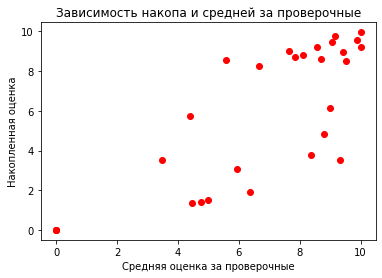

In [37]:
plt.scatter(mean_cw, gain, c='red')
plt.title('Зависимость накопа и средней за проверочные')
plt.xlabel('Средняя оценка за проверочные')
plt.ylabel('Накопленная оценка')
plt.show()

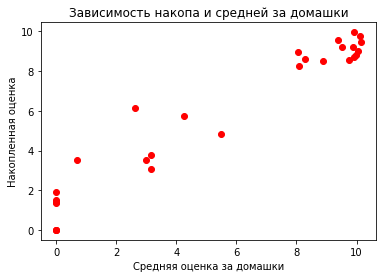

In [38]:
plt.scatter(mean_hw, gain, c='red')
plt.title('Зависимость накопа и средней за домашки')
plt.xlabel('Средняя оценка за домашки')
plt.ylabel('Накопленная оценка')
plt.show()

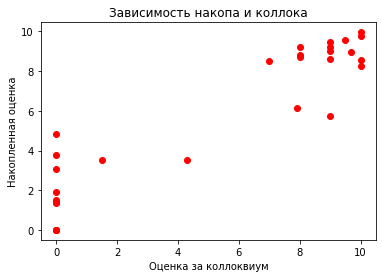

In [39]:
plt.scatter(marks[:, 6:], gain, c='red')
plt.title('Зависимость накопа и коллока')
plt.xlabel('Оценка за коллоквиум')
plt.ylabel('Накопленная оценка')
plt.show()

На отдельном графике визуализируйте отсортированные накопленные оценки: отсортруйте столбец с помощью функции np.sort, разверните слева направо (чтобы оценки оказались отсортированы по убыванию) и визуализируйте его с помощью функции plt.plot. Вновь не забудьте подписать оси!

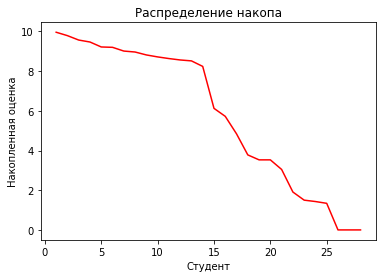

In [58]:
plt.plot(np.arange(1, gain.shape[1] + 1, 1), -np.sort(-gain)[0], c='red')
plt.title('Распределение накопа')
plt.xlabel('Студент')
plt.ylabel('Накопленная оценка')
plt.show()